In [1]:
import os

import utils

In [2]:
cases = dict()
ds_dict = dict()
varnames = "HMXL_2"
run_root = os.path.join(os.sep, "glade", "scratch", "mlevy")
archive_hist_root = os.path.join(os.sep, "glade", "scratch", "mlevy", "archive")
campaign_root = os.path.join(
    os.sep,
    "glade",
    "campaign",
    "cesm",
    "development",
    "bgcwg",
    "projects",
    "hi-res_JRA",
    "cases",
)

cases["001"] = utils.CaseClass(
    [
        "g.e22.G1850ECO_JRA_HR.TL319_t13.001",
        "g.e22.G1850ECO_JRA_HR.TL319_g17.001",
    ],
    run_root=run_root,
    archive_hist_root=archive_hist_root,
)
ds_dict["001"] = cases["001"].gen_dataset(
    stream="pop.h.nday1", varnames=varnames
)

cases["002"] = utils.CaseClass(
    "g.e22.G1850ECO_JRA_HR.TL319_t13.002",
    run_root=run_root,
    archive_hist_root=archive_hist_root,
)
ds_dict["002"] = cases["002"].gen_dataset(
    stream="pop.h.nday1", varnames=varnames
)

cases["003"] = utils.CaseClass(
    "g.e22.G1850ECO_JRA_HR.TL319_t13.003", campaign_root=campaign_root
)
ds_dict["003"] = (
    cases["003"]
    .gen_dataset(stream="pop.h.nday1", varnames=varnames, end_year=1)
    .isel(time=slice(0, 151))
)

cases["004"] = utils.CaseClass(
    "g.e22.G1850ECO_JRA_HR.TL319_t13.004", campaign_root=campaign_root
)
ds_dict["004"] = (
    cases["004"]
    .gen_dataset(stream="pop.h.nday1", varnames=varnames, end_year=1)
    .isel(time=slice(0, 151))
)

Datasets contain a total of 114 time samples
Last average written at 0001-04-25 00:00:00
Datasets contain a total of 124 time samples
Last average written at 0001-05-05 00:00:00
Datasets contain a total of 365 time samples
Last average written at 0002-01-01 00:00:00
Datasets contain a total of 365 time samples
Last average written at 0002-01-01 00:00:00


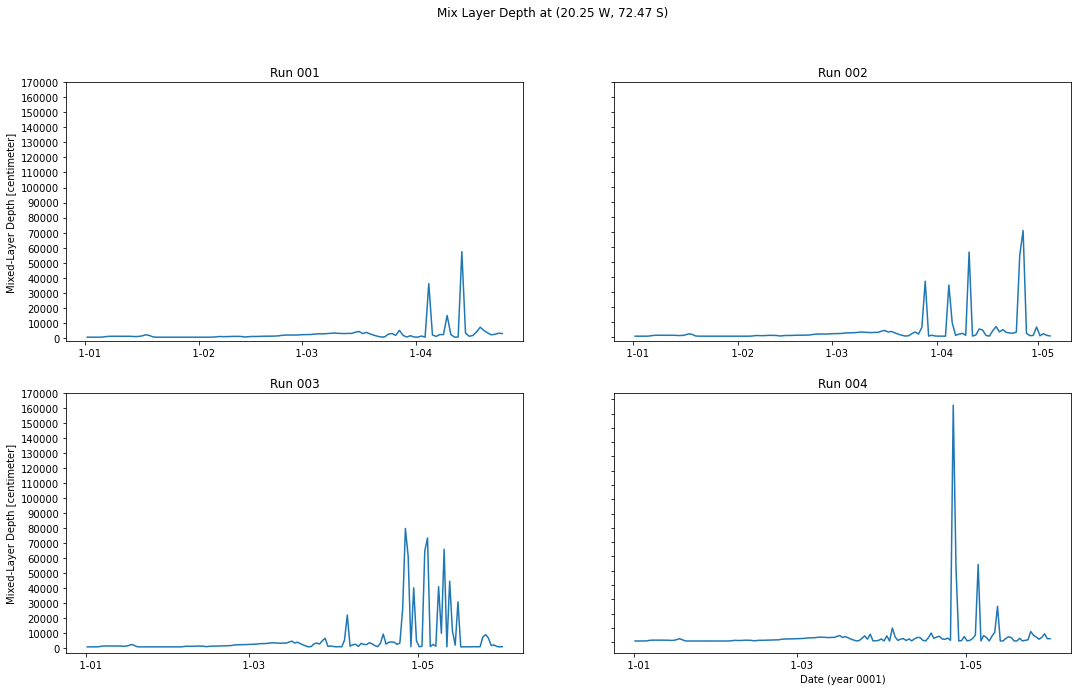

In [3]:
fig = utils.compare_fields_at_lat_lon(
    [
        ds_dict["001"]["HMXL_2"],
        ds_dict["002"]["HMXL_2"],
        ds_dict["003"]["HMXL_2"],
        ds_dict["004"]["HMXL_2"],
    ],
    nlat=142,
    nlon=897,
    individual_plots=True,
)

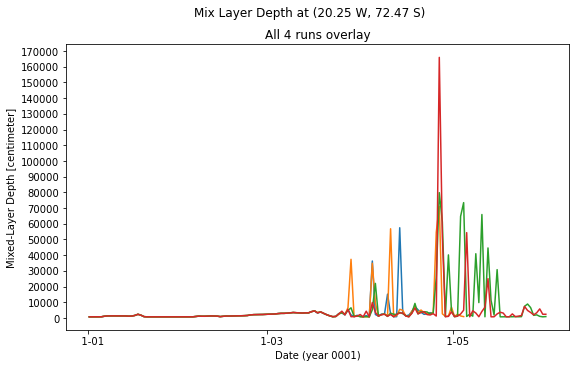

In [4]:
fig = utils.compare_fields_at_lat_lon(
    [
        ds_dict["001"]["HMXL_2"],
        ds_dict["002"]["HMXL_2"],
        ds_dict["003"]["HMXL_2"],
        ds_dict["004"]["HMXL_2"],
    ],
    nlat=142,
    nlon=897,
)